In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("D:\\Data Science\\datasets\\ML\\Exercises\\1.LinearRegression\\hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
df['experience'] = df['experience'].fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
from word2number import w2n

In [13]:
df['experience'] = df['experience'].apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [14]:
median_test_score = df['test_score(out of 10)'].median()
median_test_score

8.0

In [15]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [17]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].astype(int)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


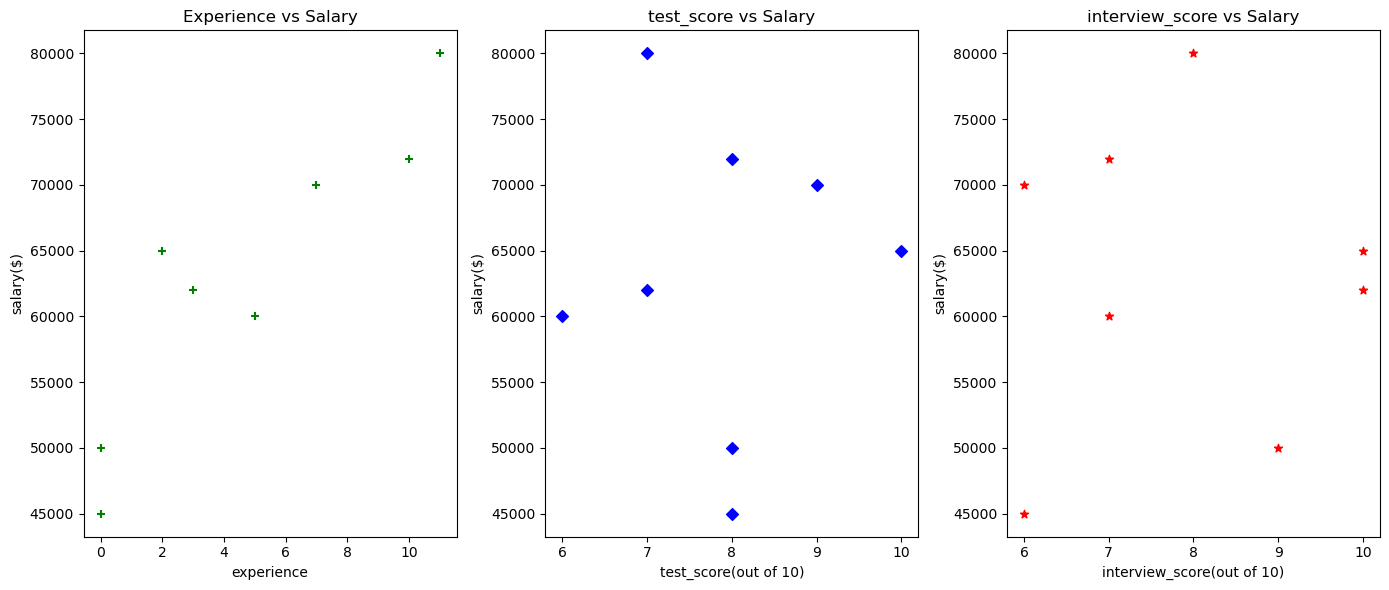

In [27]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1) 
plt.title('Experience vs Salary')
plt.xlabel('experience')
plt.ylabel('salary($)')
plt.scatter(df["experience"],df["salary($)"],color="green",marker="+")

plt.subplot(1, 3, 2)
plt.title('test_score vs Salary')
plt.xlabel('test_score(out of 10)')
plt.ylabel('salary($)')
plt.scatter(df["test_score(out of 10)"],df["salary($)"],color="blue",marker="D")

plt.subplot(1, 3, 3)
plt.title('interview_score vs Salary')
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary($)')
plt.scatter(df["interview_score(out of 10)"],df["salary($)"],color="red",marker="*")

plt.tight_layout()
plt.show()

In [32]:
model = linear_model.LinearRegression()

In [33]:
input_parameters = df.drop(columns="salary($)")
input_parameters

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8,9
1,0,8,6
2,5,6,7
3,2,10,10
4,7,9,6
5,3,7,10
6,10,8,7
7,11,7,8


In [34]:
model.fit(input_parameters,df['salary($)'])

LinearRegression()

In [36]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [37]:
model.intercept_

17737.26346433771

<b>2 years experience, 9 test score, 6 interview score</b>

In [38]:
parameters = pd.DataFrame({
    'experience':[2],
    'test_score(out of 10)':[9],
    'interview_score(out of 10)':[6]
})
parameters

,experience,test_score(out of 10),interview_score(out of 10)
0,2,9,6


In [39]:
predicted_salary = model.predict(parameters)
print("Predicted Salary : ",predicted_salary[0].round(2),"$")

Predicted Salary :  53205.97 $


<b>12 years experience, 10 test score, 10 interview score</b>

In [40]:
parameters = pd.DataFrame({
    'experience':[12],
    'test_score(out of 10)':[10],
    'interview_score(out of 10)':[10]
})
parameters

,experience,test_score(out of 10),interview_score(out of 10)
0,12,10,10


In [41]:
predicted_salary = model.predict(parameters)
print("Predicted Salary : ",predicted_salary[0].round(2),"$")

Predicted Salary :  92002.18 $
